In [68]:
from zipfile import error

import pandas as pd
import seaborn as sns


In [69]:
df = pd.read_csv('feedback.csv')
df

,Unnamed: 0,run_id,final_state,target_character,pe,branch_factor,exp_name,evaluator,total_iterations,n_self_alignment,...,Evaluation/acc_imp_perc,Evaluation/exist_imp_perc,Evaluation/reach_imp_perc,Evaluation/path_length,Evaluation/fn_imp_perc,Evaluation/fp_imp_perc,Evaluation/tn_imp_perc,Evaluation/tp_imp_perc,Evaluation/solvability,Evaluation/playability
0,1764,r91vrrbc,pe-cot_it-6_fit-hr_exp-feedback_t-sce_chr-1_1_s-1,1,cot,2,feedback,hr,6,0,...,0.288889,1.000000,1.000000,26.000002,1.300000,0.833333,0.300000,0.566667,0.566667,1.000000
1,1765,r91vrrbc,pe-cot_it-6_fit-hr_exp-feedback_t-sce_chr-1_1_s-1,1,cot,2,feedback,hr,6,0,...,0.011111,0.600000,0.133333,27.000000,2.933333,0.033333,0.033333,0.000000,0.033333,0.066667
2,1766,r91vrrbc,pe-cot_it-6_fit-hr_exp-feedback_t-sce_chr-1_1_s-1,1,cot,2,feedback,hr,6,0,...,0.000000,0.466667,0.033333,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1767,r91vrrbc,pe-cot_it-6_fit-hr_exp-feedback_t-sce_chr-1_1_s-1,1,cot,2,feedback,hr,6,0,...,0.266667,0.866667,0.866667,26.000002,1.366667,0.833333,0.366667,0.433333,0.600000,1.000000
4,1768,r91vrrbc,pe-cot_it-6_fit-hr_exp-feedback_t-sce_chr-1_1_s-1,1,cot,2,feedback,hr,6,0,...,0.022222,0.466667,0.466667,26.000002,2.933333,0.000000,0.066667,0.000000,0.033333,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,2065,mok07ipx,pe-tot_it-9_fit-hr_exp-feedback_t-sce_chr-1_1_...,1,tot,2,feedback,hr,9,0,...,0.044444,0.600000,0.200000,28.000000,2.866667,0.000000,0.133333,0.000000,0.066667,0.200000
302,2066,mok07ipx,pe-tot_it-9_fit-hr_exp-feedback_t-sce_chr-1_1_...,1,tot,2,feedback,hr,9,0,...,0.344444,0.800000,0.600000,27.000000,1.966667,0.000000,0.733333,0.300000,0.366667,0.600000
303,2067,mok07ipx,pe-tot_it-9_fit-hr_exp-feedback_t-sce_chr-1_1_...,1,tot,2,feedback,hr,9,0,...,0.000000,0.600000,0.100000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
304,2068,mok07ipx,pe-tot_it-9_fit-hr_exp-feedback_t-sce_chr-1_1_...,1,tot,2,feedback,hr,9,0,...,0.000000,0.600000,0.100000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [70]:
cot_df = df[df['pe'] == 'cot']
cot_df.groupby(['feedback_type', 'pe', 'Evaluation/llm_iteration', 'seed'])['run_id'].count()

feedback_type  pe   Evaluation/llm_iteration  seed
default        cot  1                         1       1
                                              2       1
                                              3       1
                                              4       1
                                              5       1
                                                     ..
no             cot  6                         1       1
                                              2       1
                                              3       1
                                              4       1
                                              5       1
Name: run_id, Length: 85, dtype: int64

<Axes: xlabel='Evaluation/llm_iteration', ylabel='Evaluation/acc_imp_perc'>

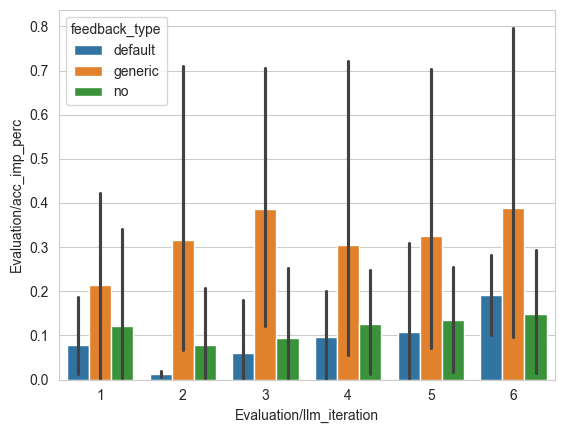

In [71]:
sns.barplot(data=cot_df, x='Evaluation/llm_iteration', y='Evaluation/acc_imp_perc', hue="feedback_type")


In [72]:
import pandas as pd


# 'Evaluation/llm_iteration'을 기준으로 정렬
df = df.sort_values(by=['pe', 'feedback_type', 'seed', 'Evaluation/llm_iteration'])
df

,Unnamed: 0,run_id,final_state,target_character,pe,branch_factor,exp_name,evaluator,total_iterations,n_self_alignment,...,Evaluation/acc_imp_perc,Evaluation/exist_imp_perc,Evaluation/reach_imp_perc,Evaluation/path_length,Evaluation/fn_imp_perc,Evaluation/fp_imp_perc,Evaluation/tn_imp_perc,Evaluation/tp_imp_perc,Evaluation/solvability,Evaluation/playability
0,1764,r91vrrbc,pe-cot_it-6_fit-hr_exp-feedback_t-sce_chr-1_1_s-1,1,cot,2,feedback,hr,6,0,...,0.288889,1.000000,1.000000,26.000002,1.300000,0.833333,0.300000,0.566667,0.566667,1.000000
1,1765,r91vrrbc,pe-cot_it-6_fit-hr_exp-feedback_t-sce_chr-1_1_s-1,1,cot,2,feedback,hr,6,0,...,0.011111,0.600000,0.133333,27.000000,2.933333,0.033333,0.033333,0.000000,0.033333,0.066667
2,1766,r91vrrbc,pe-cot_it-6_fit-hr_exp-feedback_t-sce_chr-1_1_s-1,1,cot,2,feedback,hr,6,0,...,0.000000,0.466667,0.033333,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1767,r91vrrbc,pe-cot_it-6_fit-hr_exp-feedback_t-sce_chr-1_1_s-1,1,cot,2,feedback,hr,6,0,...,0.266667,0.866667,0.866667,26.000002,1.366667,0.833333,0.366667,0.433333,0.600000,1.000000
4,1768,r91vrrbc,pe-cot_it-6_fit-hr_exp-feedback_t-sce_chr-1_1_s-1,1,cot,2,feedback,hr,6,0,...,0.022222,0.466667,0.466667,26.000002,2.933333,0.000000,0.066667,0.000000,0.033333,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,2065,mok07ipx,pe-tot_it-9_fit-hr_exp-feedback_t-sce_chr-1_1_...,1,tot,2,feedback,hr,9,0,...,0.044444,0.600000,0.200000,28.000000,2.866667,0.000000,0.133333,0.000000,0.066667,0.200000
302,2066,mok07ipx,pe-tot_it-9_fit-hr_exp-feedback_t-sce_chr-1_1_...,1,tot,2,feedback,hr,9,0,...,0.344444,0.800000,0.600000,27.000000,1.966667,0.000000,0.733333,0.300000,0.366667,0.600000
303,2067,mok07ipx,pe-tot_it-9_fit-hr_exp-feedback_t-sce_chr-1_1_...,1,tot,2,feedback,hr,9,0,...,0.000000,0.600000,0.100000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
304,2068,mok07ipx,pe-tot_it-9_fit-hr_exp-feedback_t-sce_chr-1_1_...,1,tot,2,feedback,hr,9,0,...,0.000000,0.600000,0.100000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [73]:
df

,Unnamed: 0,run_id,final_state,target_character,pe,branch_factor,exp_name,evaluator,total_iterations,n_self_alignment,...,Evaluation/acc_imp_perc,Evaluation/exist_imp_perc,Evaluation/reach_imp_perc,Evaluation/path_length,Evaluation/fn_imp_perc,Evaluation/fp_imp_perc,Evaluation/tn_imp_perc,Evaluation/tp_imp_perc,Evaluation/solvability,Evaluation/playability
0,1764,r91vrrbc,pe-cot_it-6_fit-hr_exp-feedback_t-sce_chr-1_1_s-1,1,cot,2,feedback,hr,6,0,...,0.288889,1.000000,1.000000,26.000002,1.300000,0.833333,0.300000,0.566667,0.566667,1.000000
1,1765,r91vrrbc,pe-cot_it-6_fit-hr_exp-feedback_t-sce_chr-1_1_s-1,1,cot,2,feedback,hr,6,0,...,0.011111,0.600000,0.133333,27.000000,2.933333,0.033333,0.033333,0.000000,0.033333,0.066667
2,1766,r91vrrbc,pe-cot_it-6_fit-hr_exp-feedback_t-sce_chr-1_1_s-1,1,cot,2,feedback,hr,6,0,...,0.000000,0.466667,0.033333,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1767,r91vrrbc,pe-cot_it-6_fit-hr_exp-feedback_t-sce_chr-1_1_s-1,1,cot,2,feedback,hr,6,0,...,0.266667,0.866667,0.866667,26.000002,1.366667,0.833333,0.366667,0.433333,0.600000,1.000000
4,1768,r91vrrbc,pe-cot_it-6_fit-hr_exp-feedback_t-sce_chr-1_1_s-1,1,cot,2,feedback,hr,6,0,...,0.022222,0.466667,0.466667,26.000002,2.933333,0.000000,0.066667,0.000000,0.033333,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,2065,mok07ipx,pe-tot_it-9_fit-hr_exp-feedback_t-sce_chr-1_1_...,1,tot,2,feedback,hr,9,0,...,0.044444,0.600000,0.200000,28.000000,2.866667,0.000000,0.133333,0.000000,0.066667,0.200000
302,2066,mok07ipx,pe-tot_it-9_fit-hr_exp-feedback_t-sce_chr-1_1_...,1,tot,2,feedback,hr,9,0,...,0.344444,0.800000,0.600000,27.000000,1.966667,0.000000,0.733333,0.300000,0.366667,0.600000
303,2067,mok07ipx,pe-tot_it-9_fit-hr_exp-feedback_t-sce_chr-1_1_...,1,tot,2,feedback,hr,9,0,...,0.000000,0.600000,0.100000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
304,2068,mok07ipx,pe-tot_it-9_fit-hr_exp-feedback_t-sce_chr-1_1_...,1,tot,2,feedback,hr,9,0,...,0.000000,0.600000,0.100000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [76]:
# 각 'feedback_type' 그룹 내에서 'Evaluation/acc_imp_perc'의 절대값 변화량 계산
df = df.groupby(['pe', 'feedback_type', 'Evaluation/llm_iteration']).agg({'Evaluation/acc_imp_perc': 'mean'}).reset_index()
df['acc_imp_perc_diff'] = df.groupby(['pe', 'feedback_type'])['Evaluation/acc_imp_perc'].diff()
df

,pe,feedback_type,Evaluation/llm_iteration,Evaluation/acc_imp_perc,acc_imp_perc_diff
0,cot,default,1,0.077778,NaN
1,cot,default,2,0.013333,-0.064444
2,cot,default,3,0.060000,0.046667
3,cot,default,4,0.095556,0.035556
4,cot,default,5,0.108889,0.013333
...,...,...,...,...,...
67,tot,no,5,0.435556,-0.026667
68,tot,no,6,0.508889,0.073333
69,tot,no,7,0.422222,-0.086667
70,tot,no,8,0.437778,0.015556


/var/folders/x_/2lt9k5kn52q43m1_z0kp7tfm0000gn/T/ipykernel_33408/1221918732.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from_second_df['iteration_label'] = from_second_df['Evaluation/llm_iteration'].map(iteration_labels)


Text(0, 0.5, 'Δ Accuracy Improvement')

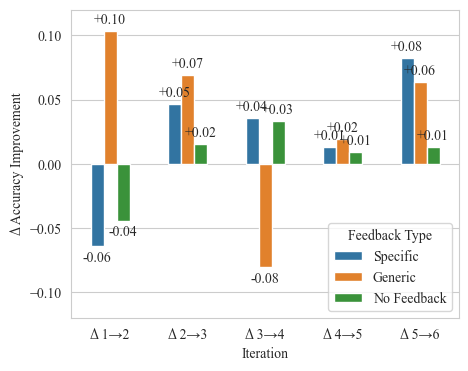

In [109]:
from matplotlib import pyplot as plt

plt.figure(figsize=(5, 4)
           )
iteration_labels = {
    2: 'Δ 1→2',
    3: 'Δ 2→3',
    4: 'Δ 3→4',
    5: 'Δ 4→5',
    6: 'Δ 5→6'
}

plt.rc('font', family='Times New Roman')  # Windows의 경우

# replace 'no' -> 'No Feedback', 'generic' -> 'Generic', 'default' -> 'Specific' in 'feedback_type'
df['feedback_type'] = df['feedback_type'].replace({'no': 'No Feedback', 'generic': 'Generic', 'default': 'Specific'})

from_second_df = df[(df['Evaluation/llm_iteration'] >= 2) & (df['Evaluation/llm_iteration'] <= 6)]
from_second_df = df[df['pe'] == 'cot']
from_second_df['iteration_label'] = from_second_df['Evaluation/llm_iteration'].map(iteration_labels)


ax = sns.barplot(data=from_second_df, x='iteration_label', y='acc_imp_perc_diff', hue="feedback_type", errorbar=None, width=0.5)
ax.set_xlim(-0.5, len(iteration_labels) - 0.5)
ax.set_ylim(-0.12, +0.12)
# 각 막대 위에 값 표시
# 각 막대 위에 ± 기호를 포함한 값 표시
for container in ax.containers:
    labels = [f"{'+' if v > 0 else ''}{v:.2f}" for v in container.datavalues]
    ax.bar_label(container, labels=labels, padding=3)
    
ax.legend(title='Feedback Type')

plt.xlabel('Iteration')
plt.ylabel('Δ Accuracy Improvement')